# Mask Detection with CNN and OpenCV

### Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
import cv2
import os
import random

## 1. Data Collection/Preparing dataset

In [2]:
def prep_dataset(data_type, size):
    cap = cv2.VideoCapture(0)

    for i in range(size):

        ret, frame = cap.read()
        result = cv2.imwrite('Downloads/mask_detection/'+data_type+'/'+str(i)+'.png', frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()

In [3]:
prep_dataset('with_mask', 2500)

In [4]:
prep_dataset('without_mask', 2500)

## 2. Data Preprocessing

In [43]:
def load_data_x():
    os.chdir(r'C:\Users\aarya\Downloads\mask_detection')
    data_x = []
    for i in os.listdir('with_mask'):
        img = cv2.imread('with_mask/' + i)
        img = cv2.resize(img, (160, 120))
        data_x.append(img)

    for i in os.listdir('without_mask'):
        img = cv2.imread('without_mask/' + i)
        img = cv2.resize(img, (160, 120))
        data_x.append(img)
        
    return data_x

In [44]:
data_x = load_data_x()

In [45]:
data_y = [y for y in [1,0] for i in range(2500)]

In [46]:
def shuffle_data():
    shuffled_data_x = []
    shuffled_data_y = []
    random_list = random.sample(range(5000), 5000)
    for i in random_list:
        shuffled_data_x.append(data_x[i])
        shuffled_data_y.append(data_y[i])
        
    return shuffled_data_x, shuffled_data_y

In [47]:
shuffled_data_x, shuffled_data_y = shuffle_data()

In [51]:
test_x = shuffled_data_x[4000:]
train_x = shuffled_data_x[:4000]
test_y = shuffled_data_y[4000:]
train_y = shuffled_data_y[:4000]

In [52]:
train_x = np.array(train_x) / 255
train_y = np.array(train_y)
test_x = np.array(test_x) / 255
test_y = np.array(test_y)


In [53]:
train_x.shape, train_y.shape

((4000, 120, 160, 3), (4000,))

In [54]:
test_x.shape, test_y.shape

((1000, 120, 160, 3), (1000,))

0


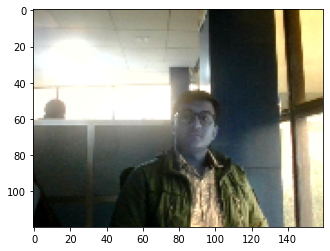

In [58]:
plt.imshow(train_x[2000])
print(train_y[2000])

1


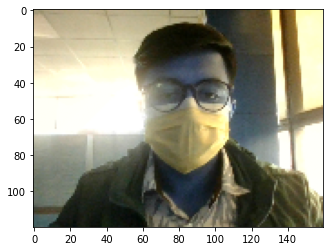

In [67]:
plt.imshow(train_x[2765])
print(train_y[2765])

## 3. Model creation and training

In [68]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(120,160,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(512, activation ='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 117, 157, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 78, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 75, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 34, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 14, 128)        2

In [70]:
history = model.fit(train_x, train_y, epochs=4, batch_size=32, validation_data=(test_x, test_y))

Epoch 1/4
125/125 [==============================] - 58s 452ms/step - loss: 0.2077 - accuracy: 0.8882 - val_loss: 0.0465 - val_accuracy: 0.9890
Epoch 2/4
125/125 [==============================] - 60s 481ms/step - loss: 0.0329 - accuracy: 0.9912 - val_loss: 3.3756e-05 - val_accuracy: 1.0000
Epoch 3/4
125/125 [==============================] - 60s 480ms/step - loss: 2.9227e-05 - accuracy: 1.0000 - val_loss: 3.8256e-06 - val_accuracy: 1.0000
Epoch 4/4
125/125 [==============================] - 58s 462ms/step - loss: 6.3511e-06 - accuracy: 1.0000 - val_loss: 1.3192e-06 - val_accuracy: 1.0000


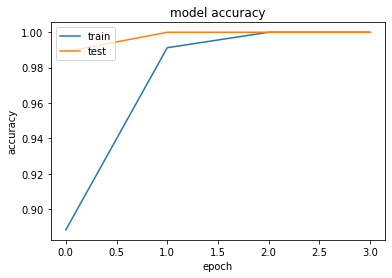

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

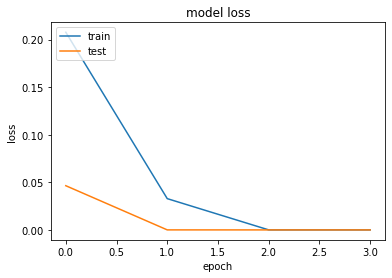

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 4. Model Inferencing

15.833333333333334


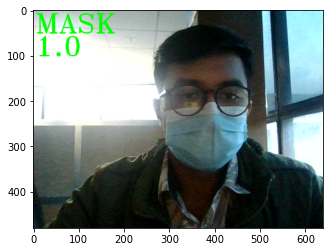

In [80]:
import datetime as time

cap = cv2.VideoCapture(0)

count = 0
initial = time.datetime.now()
while True:
    
    ret, frame = cap.read()
    temp_frame = frame.copy()
    frame = cv2.resize(frame, (160, 120))
    frame = frame/255    
    
    count+=1

    frame = frame.reshape(1,120,160,3)
    prediction = model.predict(frame)

    if prediction > 0.5:
        text = "MASK"
        color = (0,255,0)
    else:
        text = "NO MASK"
        color = (0,0,255)
    
    cv2.putText(img=temp_frame, text=text, org=(5, 50), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2,color=color,thickness=2)
    cv2.putText(img=temp_frame, text=str(prediction[0,0]), org=(5, 100), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2,color=color,thickness=2)
   

    cv2.imshow('frame', temp_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
final = time.datetime.now()
deltatime = final-initial
if deltatime.seconds != 0:
    print(count/deltatime.seconds)
    
cap.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(temp_frame, cv2.COLOR_RGB2BGR))

## 5. Saving Model

In [74]:
model.save('mask_detection.h5')